### Introduction

#### a. What question are you answering with your project?

Our project is answering the question that which factors influence the employee attrition. Understanding the influencing factors of attrition decisions is useful for finding the balance between labor costs and labor dividends.

#### b. Why should we care about this question?

First, as students about to graduate from school and enter the workplace, we are very interested in this topic. As future employees of the enterprise, the problem of employee turnover may be a problem we will face in the future. Specifically, employee turnover refers to the loss of employees under various circumstances, such as resignation and retirement, which may be voluntary or involuntary. Each industry has its standards for acceptable attrition rates, which can vary between skilled and unskilled jobs. We wanted to know if the factors people think are closely related to employee turnover. What other hidden factors affect employee turnover?

In addition, the topic of attrition is crucial in today's business. In daily life, we can often see reports about employee turnover. First, the issue of employee turnover is the principal organizational problem because the cost of training new employees is very high. Hence, managers and human resource directors are very concerned about personnel turnover. Recruiters explain that high employee turnover can significantly increase a company's investment costs in employees, such as investing a lot of time and money to acquire skilled employees. Therefore, professional and excellent employees are the company's most valuable asset, which helps maximize the efficiency and progress of the organization. In addition, qualified employees add value to the organization in terms of quantity and quality.

In most cases, therefore, both large and small companies must have a talented workforce with them for a long time. However, if the turnover increases beyond a certain level, the gain becomes a disadvantage. Recruiters explain that the highest turnover rates significantly increase investment in employees, such as investing a lot of time and money to acquire skilled employees. These questions all make employee attrition an interesting question for our research.

#### c. Have there been previous papers in the economics literature addressing this question?Summarize previous research briefly.

+ Frye, A., Boomhower, C., Smith, M., Vitovsky, L., & Fabricant, S. (2018) analyzed what made an employee quit. They pointed out that employee attrition was a costly challenge faced by many employers. They used U.S. Office Personnel Management (OPM) data and merged ten attributes from the Bureau of Labor Statistics (BLS) to find the reasons. They also involved an external validation by using IBM data. Then they applied Principal Component Analysis and performed modeling using Random Forest, K-Nearest Neighbor, and Logistic Regression. After doing those steps, they found three main reasons:
    + A significant reduction in the odds of an employee quitting as their service length increases.
    + Odds increase or decrease depending on employee age.
    + The odds of quitting are less if the employee is in the standard payment plan.
+ Adhikari A. (2009) analyzed the factors that would affect employee attrition. He pointed out that the employee attrition in Indian Information Technology (IT) and Information Technology Enabled Services (ITES) was high. He collected 350 random samples from people who worked in the IT and ITES industries to find the factors. Then he used multiple regression to complete the analysis. He finally found four factors that will affect employee attrition: work-related issues have the highest effect on attrition; elements on employment-related matters and employees' skills have almost the same result, and the compensation has the lowest impact on attrition. He also suggested that employees give more importance to the quality of the job and employer's treatment than salary, and employers should be more careful in assigning tasks to particular employees and a workgroup based on the employee's interest.
+ Alao, D. A. B. A., & Adeyemo, A. B. (2013) analyzed what related attributes contributed to employee attrition. The authors pointed out that employee attrition is a severe concern in knowledge-based organizations because employees who leave the company carry with them invaluable tacit knowledge, which is often the source of competitive advantage for the business. If an organization wants to continually have a higher competitive advantage over its competition, it should make it a duty to minimize employee attrition. Then they used decision tree algorithms which were part of the data mining process, to propose the data and build a predictive model. The data had 309 observations from Higher Institutions in Nigeria who worked in and left the institution between 1978 and 2006. After analyzing 309 observations, they found that employee Salary and Length of service were determining factors for employee attrition.
+ Regarding the work environment, Shamsuzzoha indicates that employees are more likely to stay when there is a predictable work environment and vice versa. The main reasons for leaving are salary, work environment, and job security. Employees were also forced to leave due to dissatisfaction with their current workplace. Marce et al. (2004) stated that employees leave the organization for financial reasons. The general reason why employee turnover is so high in the salary range is that employees are generally looking for jobs that pay well. According to Marce, “engaged employees (43%) are more likely to feel they are being paid appropriately for their work compared to disengaged employees (15%) or actively engaged employees (13%). The empirical results on the relationship between organizational commitment, job satisfaction, and turnover intention confirm that these variables significantly negatively impact turnover intention (Bartle, Dansby, Landis, and McIntyre, 2002). Itsuggests that employees with high job satisfaction are more productive, more organizationally committed, more willing to make sacrifices, and more challenging to leave.

### Exploratory Data Analysis

We are trying to find attrition data for a specific company on kaggle, which should be rich in variables and of a suitable size. Finally, we found IBM's attrition data for a certain year in this link (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/code?datasetId=1067&sortBy=dateRun&language=Python), the name of this data is IBM HR Analytics Employee Attrition & Performance.

We start by reading in the data and making a simple observation.

In [1]:
import numpy as np 
import pandas as pd
from subprocess import check_output
 
import plotly.offline as py
py.init_notebook_mode(connected=True)
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in data and do some simple obervations
dataset=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataset.shape

(1470, 35)

This dataset has 1470 items, including 35 variables. It can be seen that there are two types of variables, numeric type and categorical type. We look at the basic information of these two types respectively.

In [3]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()

In [4]:
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
categorical_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

Take a closer look at all variables, we can see that they convey some information from the perspective of the company and employees respectively. For example, Age, DistanceFromHome, Educaton, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, MonthltRate, RelationshipSatisfaction, Gender, EducationField, MaritalStatus describe the situation of the employee.The others describe the company.

In [6]:
numeric_isnull = dataset[numeric_cols].isna().sum().sort_values(ascending=False)
numeric_isnull[numeric_isnull > 0]

Series([], dtype: int64)

In [7]:
categorical_isnull = dataset[numeric_cols].isna().sum().sort_values(ascending=False)
categorical_isnull[numeric_isnull > 0]

Series([], dtype: int64)

We can see that both numeric variable and categorical variable are free of missing values, so no additional preprocessing is required.

Let's look at the quality of variables. For numeric variables we care about its distribution, and for categorical distributions we care about attrition portion in different categories and will draw a histogram to gain an intuitive understanding.

In [8]:
dataset[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


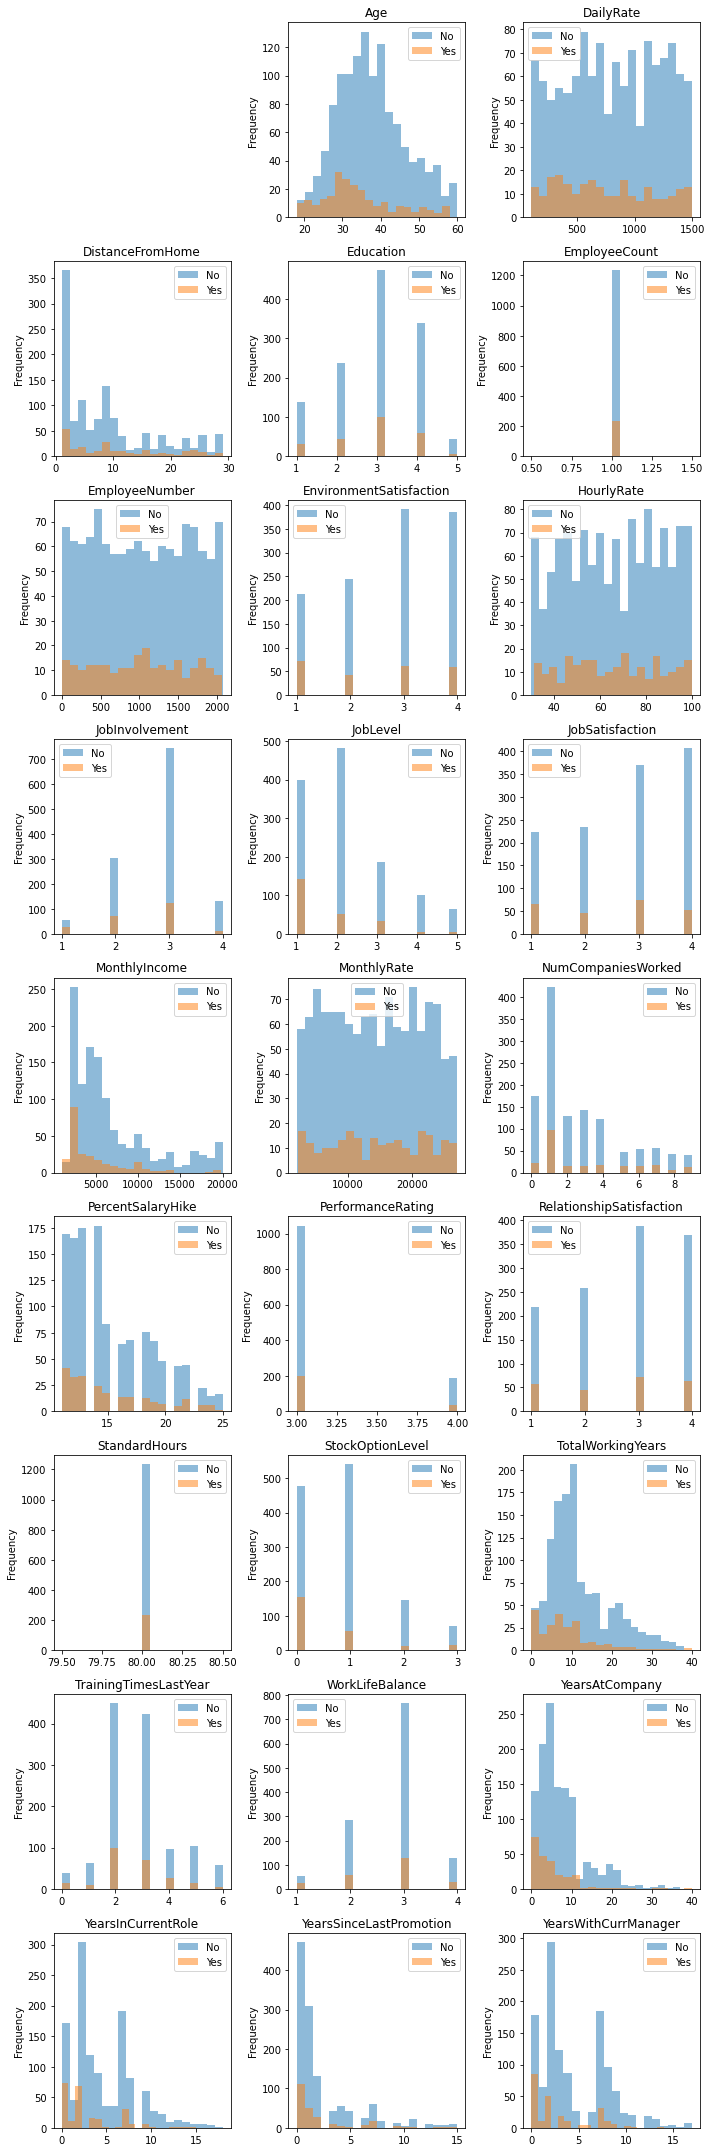

In [9]:
numeric_dataset = pd.concat([dataset['Attrition'],dataset[numeric_cols]],axis = 1)
fig = plt.figure(figsize=(10, 30))
cols = 3
target_column = "Attrition"
rows = np.ceil(float(numeric_dataset.shape[1] / cols))
for i, column in enumerate(numeric_dataset.columns):
    if target_column == column:
        continue
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if numeric_dataset.dtypes[column] == np.object:
        cts = numeric_dataset[[target_column, column]]
        cts = cts.groupby([target_column, column]).size()
        cts.unstack().T.plot(kind="bar", ax=ax, stacked=True, alpha=0.5)
    else:
        cts = numeric_dataset[[target_column, column]]
        cts.groupby(target_column)[column].plot(
            bins=20,
            kind="hist",
            stacked=True,
            alpha=0.5,
            legend=True,
            ax=ax
        )
plt.tight_layout()
plt.savefig('numeric_describe.png')

The above figure shows the distribution of continuous variables when the attribute variable takes 1 and 0 respectively. It can be seen that all continuous variables have similar shapes under these two types of samples, so the quality of the variables is better. The two variables EmployeeCount and StandardHours have only one value, so they should be deleted.

In [10]:
dataset[categorical_cols].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


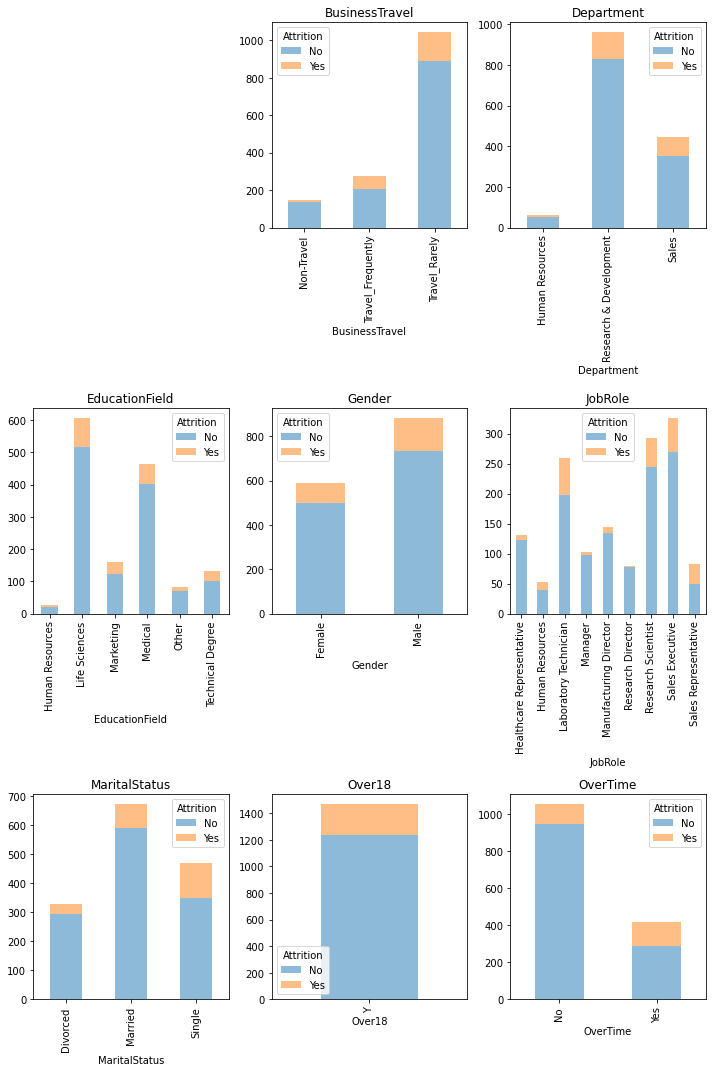

In [11]:
categorical_dataset = dataset[categorical_cols]
fig = plt.figure(figsize=(10, 15))
cols = 3
target_column = "Attrition"
rows = np.ceil(float(categorical_dataset.shape[1] / cols))
for i, column in enumerate(categorical_dataset.columns):
    if target_column == column:
        continue
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if categorical_dataset.dtypes[column] == np.object:
        cts = categorical_dataset[[target_column, column]]
        cts = cts.groupby([target_column, column]).size()
        cts.unstack().T.plot(kind="bar", ax=ax, stacked=True, alpha=0.5)
    else:
        cts = categorical_dataset[[target_column, column]]
        #(xmin, xmax) = (min(cts[column].tolist()), max(cts[column].tolist()))
        cts.groupby(target_column)[column].plot(
            bins=20,
            kind="hist",
            stacked=True,
            alpha=1,
            legend=True,
            ax=ax,
            #range=[xmin, max]
        )
plt.tight_layout()
plt.savefig('categorical_describe.png')

The variable Over18 has only one value and does not play a role in classification, so it is excluded. We can guess that these two variables will not affect attrition decision and thus are not important and can be deleted. The remaining categorical variables have large differences in the distribution of attrtion among different categories.

We will then take a closer look at the following variables:
+ Outcome
    + Attrition
+ Numeric Covariates
    + MonthlyIncome
    + PercentSalaryHike
    + DistanceFromHome
+ Categorical Covariates
    + Gender
    + MaritalStatus
    + Department
    
We choose these variables because they are representative: 
+ Outcome is the key variable we care about and want to predict;
+ MonthlyIncome is a concentrated reflection of the working conditions of employees;
+ PercentSalaryHike is a reflection of the closeness of the relationship between employees and the company;
+ Other variables are more or less related to work ability, only DistanceFromHome does not have much relationship to ability of employee;
+ Gender and MaritalStatus are from the perspective of employees;
+ Department is from the perspective of the company.

+ Attrition

([<matplotlib.patches.Wedge at 0x7fcb90b02fa0>,
 [Text(-1.4865598586092734, 0.8247058789481118, 'No'),
  Text(1.530282207391899, -0.8489619342112916, 'Yes')],
 [Text(-0.830724626869888, 0.4608650500004153, '83.9%'),
  Text(0.8744469756525135, -0.48512110526359514, '16.1%')])

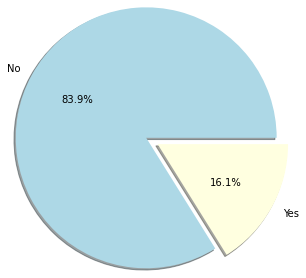

In [12]:
r = dataset.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'],radius=1.5, autopct='%1.1f%%',colors=['lightblue', 'lightyellow'],shadow=True)

It can be seen that the number of the two categories is not balanced, which is caused by the research topic.

+ MonthlyIncome

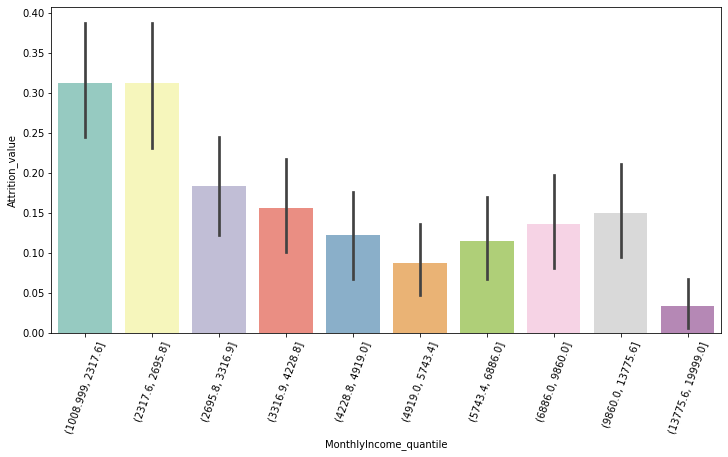

In [13]:
temp = dataset[['Attrition','MonthlyIncome']]
temp['Attrition_value'] = np.array([temp['Attrition'].iloc[i]=='Yes' for i in range(len(temp))])
plt.figure(figsize=(12,6))
np.random.seed(123) 
sns.barplot(data=temp.assign(MonthlyIncome_quantile=pd.qcut(temp["MonthlyIncome"], q=10)), 
            x="MonthlyIncome_quantile", y="Attrition_value",palette = "Set3")
plt.xticks(rotation=70)
plt.show()

From the attrition rate in each interval, it can be seen that groups with lower wages are more prone to attrition, but from the latter interval, the effect of wages does not seem to be a simple linear relationship.

+ PercentSalaryHike

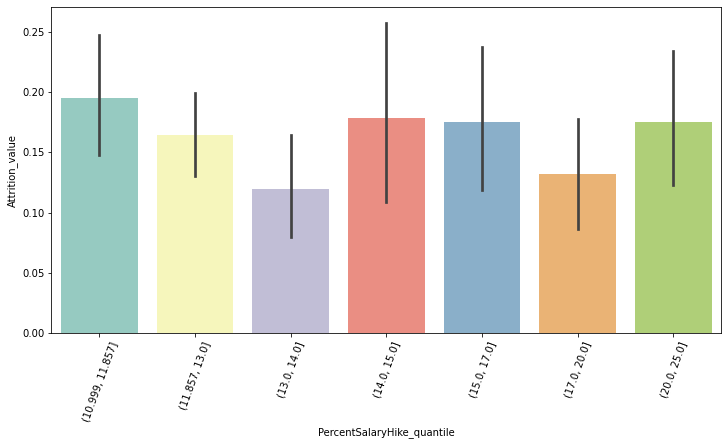

In [14]:
temp = dataset[['Attrition','PercentSalaryHike']]
temp['Attrition_value'] = np.array([temp['Attrition'].iloc[i]=='Yes' for i in range(len(temp))])
plt.figure(figsize=(12,6))
np.random.seed(123) 
sns.barplot(data=temp.assign(PercentSalaryHike_quantile=pd.qcut(temp["PercentSalaryHike"], q=7)), 
            x="PercentSalaryHike_quantile", y="Attrition_value",palette = "Set3")
plt.xticks(rotation=70)
plt.show()

+ DistanceFromHome

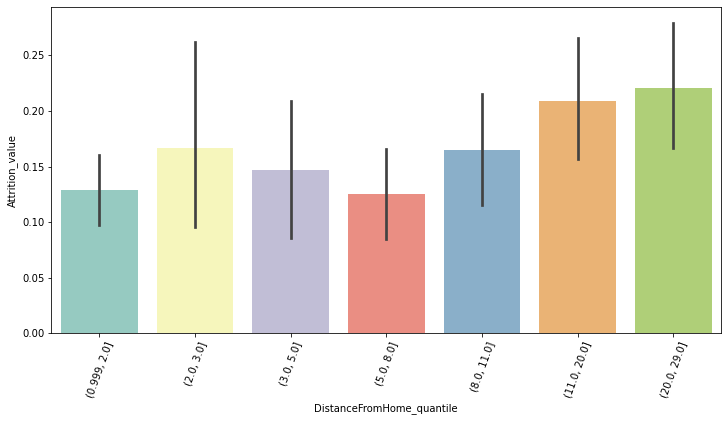

In [15]:
temp = dataset[['Attrition','DistanceFromHome']]
temp['Attrition_value'] = np.array([temp['Attrition'].iloc[i]=='Yes' for i in range(len(temp))])
plt.figure(figsize=(12,6))
np.random.seed(123) 
sns.barplot(data=temp.assign(DistanceFromHome_quantile=pd.qcut(temp["DistanceFromHome"], q=7)), 
            x="DistanceFromHome_quantile", y="Attrition_value",palette = "Set3")
plt.xticks(rotation=70)
plt.show()

For both PercentSalaryHike and DistanceFromHome, there is no significant difference in the performance of attrition in each interval, and the specific impact may need to be observed in the model.

+ Gender

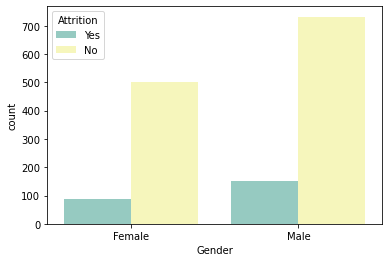

In [16]:
sns.countplot(x='Gender', palette = "Set3", hue='Attrition', data=dataset)

There is no significant difference in the ratio of attrition and non-attrition between two genders, and it is necessary to look at the effect of gender as a variable in subsequent modeling.

+ MaritalStatus

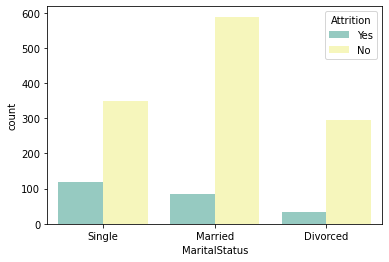

In [17]:
sns.countplot(x='MaritalStatus', palette = "Set3", hue='Attrition', data=dataset)

It can be seen that the proportion of attrition in the married group is the lowest, probably because this part of the group tends to have a stable working status.

+ Department

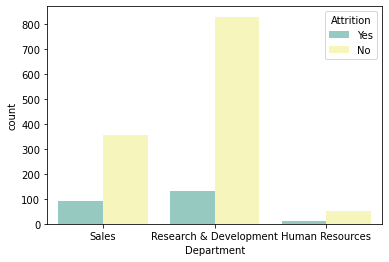

In [18]:
sns.countplot(x='Department', palette = "Set3", hue='Attrition', data=dataset)

It can be seen that the attrition rate of technical positions (R&D) is the lowest, and the attrition rate of HR positions with higher substitution is the most obvious, which is consistent with life experience.

In [19]:
# turn attrition object into float variable
dataset.Attrition_numeric = dataset.Attrition
dataset.loc[dataset.Attrition == 'Yes','Attrition_numeric'] = 1
dataset.loc[dataset.Attrition == 'No','Attrition_numeric'] = 0

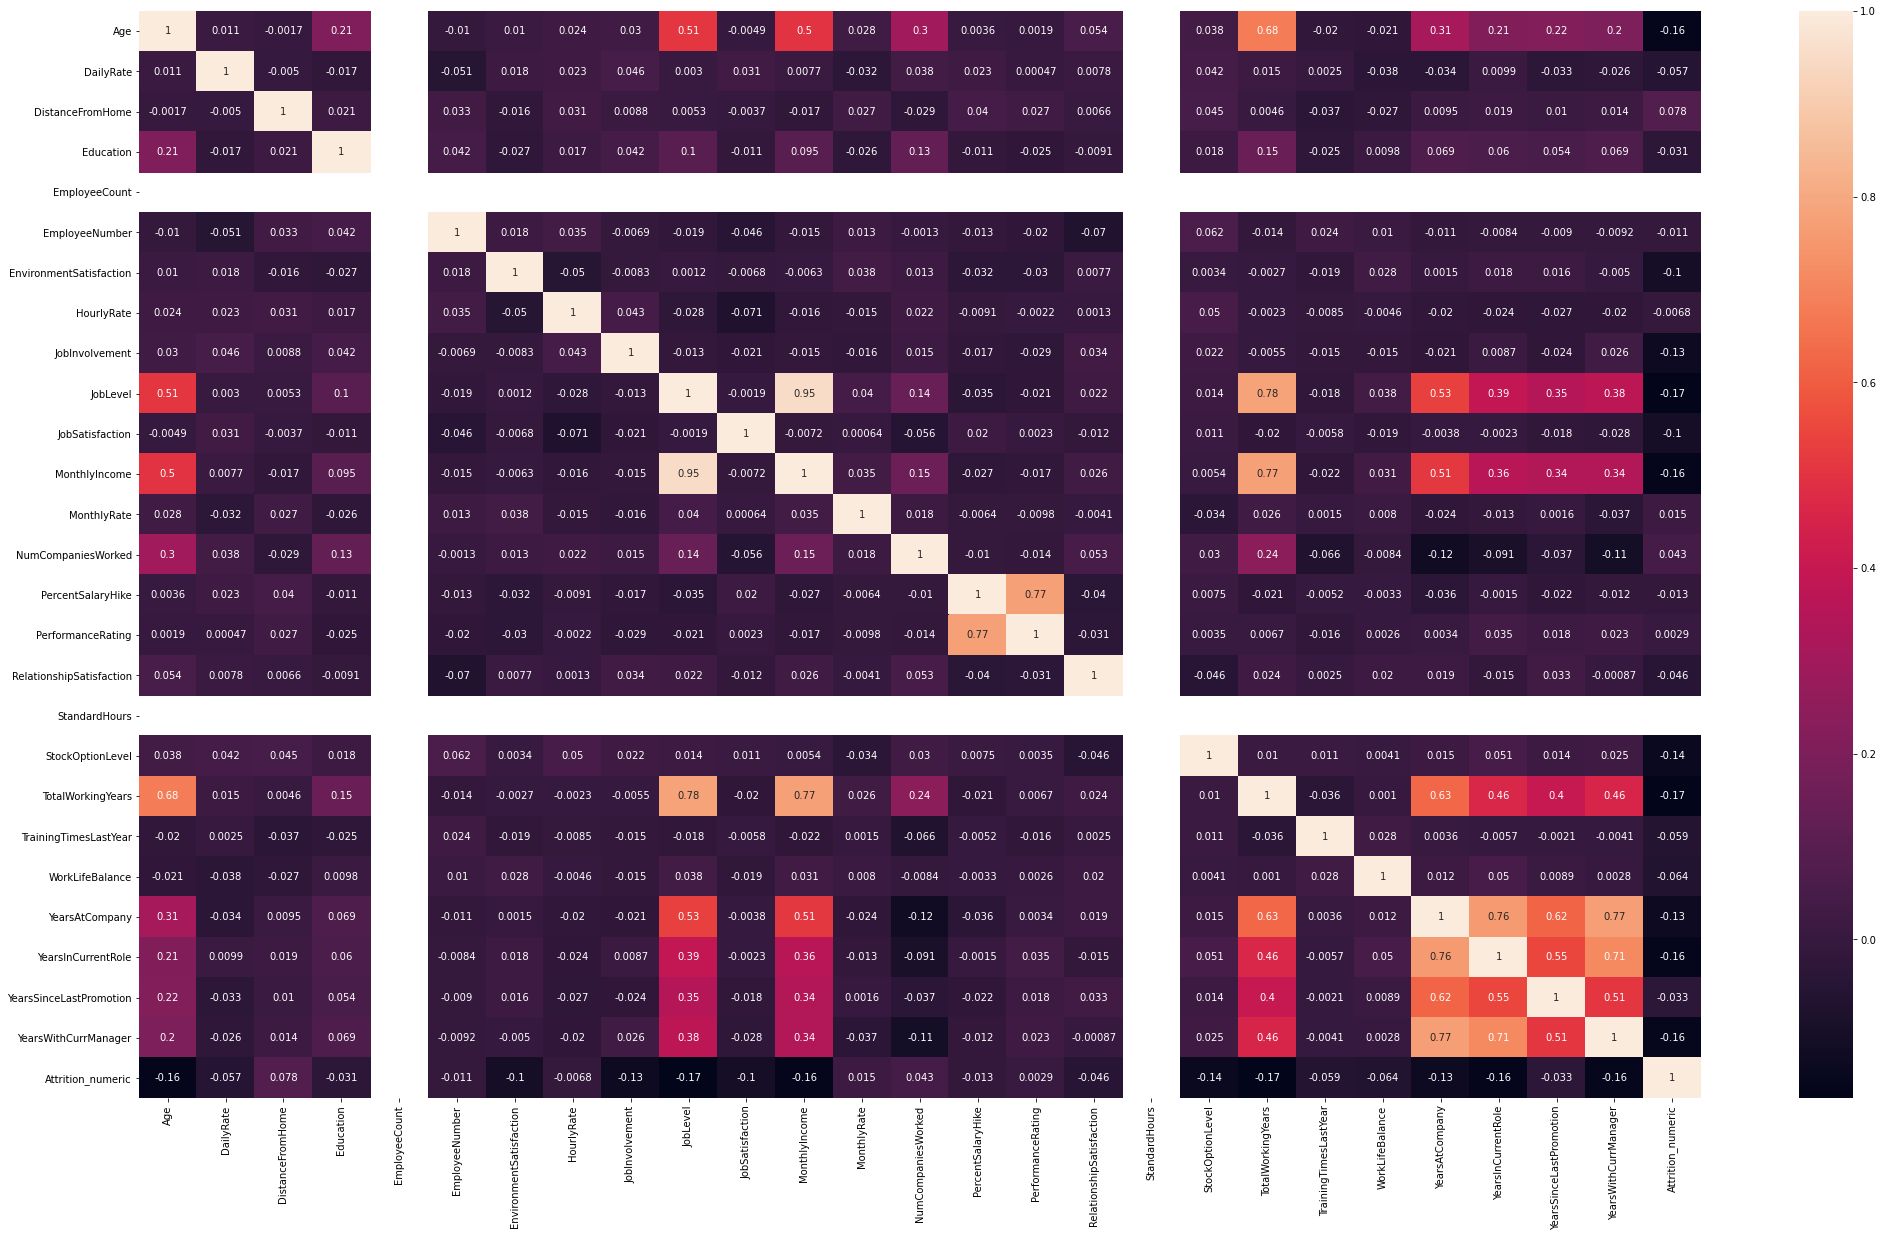

In [20]:
f, ax = plt.subplots(figsize=(35, 20))
sns.heatmap(dataset.corr(), annot=True)
plt.savefig('correlation.png')

From the correlation analysis, it can be seen that MonthlyInocome and JobLevel have a particularly strong correlation, so we keep MonthlyIncome rather than JobLevel because MonthlyIncome is more comprehensive and detailed than JobLevel.

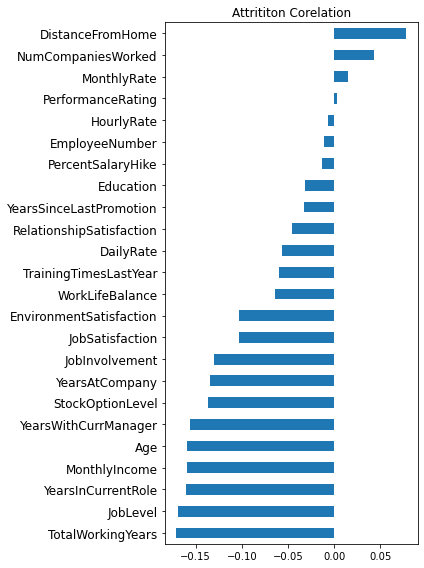

In [21]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
ax = dataset.corr()["Attrition_numeric"].drop("Attrition_numeric").drop("StandardHours").drop("EmployeeCount").sort_values().plot(kind="barh", figsize=(6, 8), ax=ax)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title("Attrititon Corelation")
plt.tight_layout()
plt.savefig('attrition_correlation.png')

Observe the correlation between independent variables and dependent variables, PerformanceRating, HourlyRate, EmployeeNumber correlation is low, can be deleted before modeling.

In [22]:
dataset = dataset.drop(['Attrition_numeric'], axis=1) 
dataset = dataset.drop(['Over18'], axis=1)
dataset = dataset.drop(['EmployeeCount'], axis=1)
dataset = dataset.drop(['StandardHours'], axis=1)
dataset = dataset.drop(['JobLevel'], axis=1) 
dataset = dataset.drop(['HourlyRate'], axis=1) 
dataset = dataset.drop(['EmployeeNumber'], axis=1)
dataset = dataset.drop(['PerformanceRating'], axis=1)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1,6,3,3,2,2,2,2


To sum up, we eliminated Over18, JobLevel, HourlyRate, EmployeeNumber, PerformanceRating, and the remaining 27 covariates and 1 outcome were introduced into the model for detailed analysis.

### Modeling

#### Data Processing

In this part, we prepare data for the model. Fisrt of all, we split the whole dataset into 70% train data and 30% test data. Then we change str-type data into label to put them into the RandomForestClassifier. Finally, we standardize the variables. 

In [23]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()
for name in categorical_cols:
    dataset[name] = LabelEncoder().fit_transform(dataset[name])
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,4,1,6,3,3,2,2,2,2


In [24]:
# split dataset into train data and test data
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.3, random_state=13)
all_cols = dataset.columns
covariates_cols = np.delete(all_cols.values,1)
X_train = train[covariates_cols]
y_train = train['Attrition']
X_test = test[covariates_cols]
y_test = test['Attrition']

In [25]:
# standardize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Random Forest

We now use these 27 variables to model attrition, get the following model, and analyze the importance of variables.

In [26]:
from sklearn.ensemble import RandomForestClassifier
# fit Random Forest Model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [27]:
from sklearn.metrics import f1_score
acc = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print('The accuracy of the Random Forest Model is',acc)
print('The F1 score of the Random Forest Model is',f1)

The accuracy of the Random Forest Model is 0.8480725623582767
The F1 score of the Random Forest Model is 0.12987012987012989


The accuracy of the model is relatively good, indicating that the predictive ability of the model is relatively good. On this basis, the F1 score is examined, and the performance is relatively general, indicating that the recognition ability of the model needs to be improved, which may be due to the uneven distribution of dependent variables.

In [28]:
# feature importance
importances = rnd_clf.feature_importances_
importance_df = pd.DataFrame(index = covariates_cols, columns = ['feature_importance'])
for i in range(len(covariates_cols)):
    importance_df.loc[covariates_cols[i]] = importances[i]
importance_df = importance_df.sort_values(by = 'feature_importance',axis = 0,ascending = False)
importance_df

,feature_importance
OverTime,0.110732
MonthlyIncome,0.107841
Age,0.091737
TotalWorkingYears,0.091697
YearsAtCompany,0.054335
DailyRate,0.051778
EnvironmentSatisfaction,0.044837
YearsWithCurrManager,0.038471
DistanceFromHome,0.036875
JobInvolvement,0.035425


In [29]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
 
# Scatter plot 
trace = go.Scatter(
    y = rnd_clf.feature_importances_,
    x = covariates_cols,
    #x = attrition_final.columns.values,
    
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 6,
        #size= rf.feature_importances_,
        #color = np.random.randn(500),
        color = rnd_clf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = covariates_cols
)
data = [trace]
 
layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='feature importance')

We ranked these variables in order of importance, as shown in the table above. We also visualize the model importance coefficient and get the above figure. In order to simplify the model, select the top ten variables of importance, which are:
+ OverTime
+ MonthlyIncome
+ Age
+ TotalWorkingYears
+ YearsAtCompany
+ DailyRate
+ EnvironmentSatisfaction
+ YearsWithCurrManager
+ DistanceFromHome
+ JobInvolvement

OverTime, YearsAtCompany, YearsWithCurrManager, EnvironmentSatisfaction all indicate the closeness of the relationship between the employee and the company, MonthlyIncome, DailyRate, JobInvolvement all indicate the employee's work efficiency, Age and DistanceFromHome are the employee's own attributes.

Then we use the top ten important variables above to build a new Random Forest model.

In [30]:
top_ten_covariates = importance_df.iloc[:10,0].index.values
top_ten_covariates

array(['OverTime', 'MonthlyIncome', 'Age', 'TotalWorkingYears',
       'YearsAtCompany', 'DailyRate', 'EnvironmentSatisfaction',
       'YearsWithCurrManager', 'DistanceFromHome', 'JobInvolvement'],
      dtype=object)

In [31]:
# split dataset into train sample and test sample
train, test = train_test_split(dataset, test_size=0.3, random_state=13)
X_train = train[top_ten_covariates]
y_train = train['Attrition']
X_test = test[top_ten_covariates]
y_test = test['Attrition']
# standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
new_rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
new_rnd_clf.fit(X_train, y_train)
y_pred_new = new_rnd_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)
print('The accuracy of the Random Forest Model is',acc)
print('The F1 score of the Random Forest Model is',f1)

The accuracy of the Random Forest Model is 0.854875283446712
The F1 score of the Random Forest Model is 0.23809523809523808


It can be seen that after removing unimportant variables, the F1score of the model has been significantly improved, and the recognition ability has been improved while ensuring accuracy.

In [33]:
# feature importance
importances = new_rnd_clf.feature_importances_
importance_df = pd.DataFrame(index = top_ten_covariates, columns = ['feature_importance'])
for i in range(len(top_ten_covariates)):
    importance_df.loc[top_ten_covariates[i]] = importances[i]
importance_df = importance_df.sort_values(by = 'feature_importance',axis = 0,ascending = False)
importance_df

,feature_importance
MonthlyIncome,0.171763
OverTime,0.161901
Age,0.133101
TotalWorkingYears,0.117989
DailyRate,0.093088
YearsAtCompany,0.082374
EnvironmentSatisfaction,0.065948
DistanceFromHome,0.06302
JobInvolvement,0.056801
YearsWithCurrManager,0.054015


There is no difference in the magnitude of the importance of these ten variables, and there is no major change in the order of importance. So we can conclude that the model is robust.

In [34]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
import pydotplus
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, y_train)
 
y_pred = decision_tree.predict(X_test)
feature_name = importance_df.index.values
 
with open("tree1.dot", 'w') as f:
    f= tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = feature_name,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )

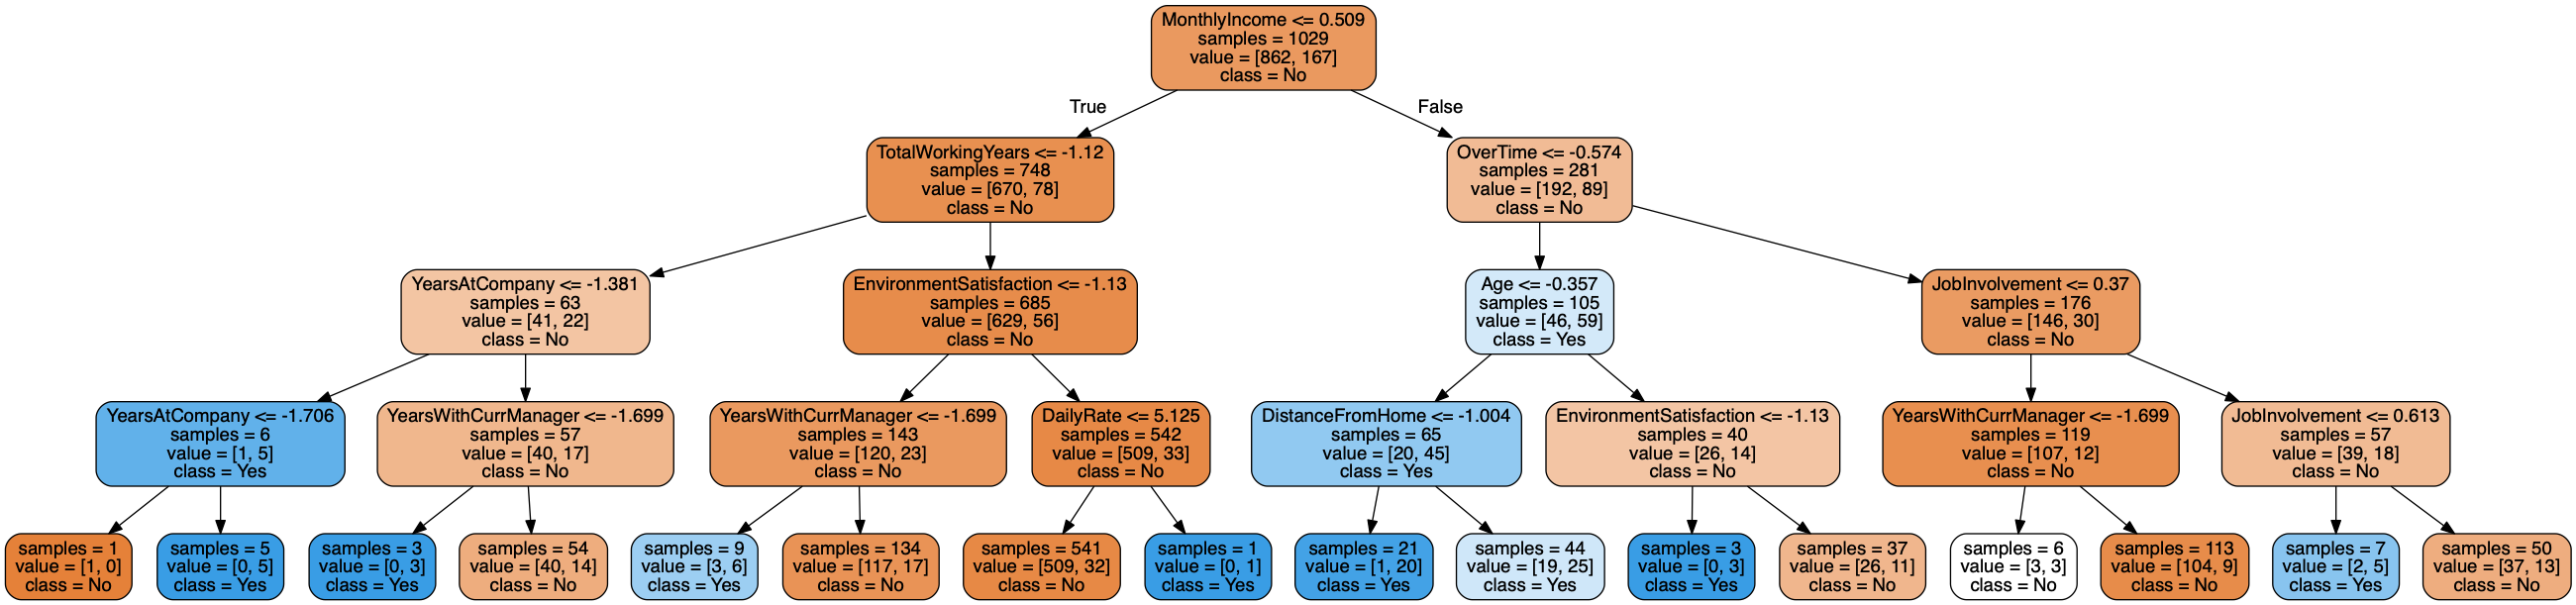

In [35]:
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png") 

+ OverTime, YearsAtCompany, YearsWithCurrManager, EnvironmentSatisfaction all indicate the closeness of the relationship between employees and the company. The closer the employees are to the company, the less likely they are to be laid off. 
+ MonthlyIncome, DailyRate, and JobInvolvement all indicate the work efficiency of employees, and employees with high work efficiency are generally not laid off.
+ Age and DistanceFromHome are the employee's own attributes. Younger people may be less experienced and more likely to be attenuated, indicating that large companies may tend to retain employees with work experience. The farther away from home, the easier it is to be laid off. It may be because there is no way to deal with emergencies for objective reasons, which is what big companies value more.

Next, we replace the training set and test set to see the robustness of the model.

In [36]:
# split dataset into train sample and test sample
train, test = train_test_split(dataset, test_size=0.3, random_state=3)
X_train = train[top_ten_covariates]
y_train = train['Attrition']
X_test = test[top_ten_covariates]
y_test = test['Attrition']
# standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
new_rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=2)
new_rnd_clf.fit(X_train, y_train)
y_pred_new = new_rnd_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)
print('The accuracy of the Random Forest Model is',acc)
print('The F1 score of the Random Forest Model is',f1)

The accuracy of the Random Forest Model is 0.8390022675736961
The F1 score of the Random Forest Model is 0.21978021978021978


In [38]:
# feature importance
importances = new_rnd_clf.feature_importances_
importance_df = pd.DataFrame(index = top_ten_covariates, columns = ['feature_importance'])
for i in range(len(top_ten_covariates)):
    importance_df.loc[top_ten_covariates[i]] = importances[i]
importance_df = importance_df.sort_values(by = 'feature_importance',axis = 0,ascending = False)
importance_df

,feature_importance
MonthlyIncome,0.215698
OverTime,0.147198
TotalWorkingYears,0.141233
Age,0.113209
DailyRate,0.088706
YearsAtCompany,0.08211
DistanceFromHome,0.068847
YearsWithCurrManager,0.053138
EnvironmentSatisfaction,0.048505
JobInvolvement,0.041357


We found that the top ten important variables did not change, nor did the predictive and discriminative abilities differ significantly, so the model is robust.

### Conclusion

In this report, we first conducted an exploratory analysis of the data to intuitively feel the distribution characteristics of the variables, and eliminated some variables with poor quality. Next, we build a random forest model for the remaining 27 variables, and use the top ten important factors to fit a new Random Forest model. The new model has improved recognition ability, and the importance of these ten covariates is similar to the first model, so they should be retained. Then we analyze the specific influence of these factors, and we find that the younger the employee is and the closer he lives to the company, the less likely he or she is to be laid off. Employees who are more productive and have strong ties to the company are also less likely to be laid off.

It should be noted that during the data exploration phase, we found that the distribution of the dependent variable is not balanced, which has room for improvement in the future.